In [293]:
# Importing the necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


In [294]:
# Import the data for Italy
df_italy = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')


In [295]:
df_italy = df_italy.drop(['note_en','note_it'], axis=1)

In [296]:
df_italy.head(2)


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623


In [297]:
# English translations of the column names
df_italy.columns =['date', 'state', 'hospitalized with symptoms', 'intensive care', 'total hospitalized', 'home isolation', 'total currently positive', 'change in positive','new currently positive', 'discharged healed', 'deceased', 'total cases', 'total tested']

In [298]:
df_italy.columns


Index(['date', 'state', 'hospitalized with symptoms', 'intensive care',
       'total hospitalized', 'home isolation', 'total currently positive',
       'change in positive', 'new currently positive', 'discharged healed',
       'deceased', 'total cases', 'total tested'],
      dtype='object')

In [299]:
# get the date portion of the date_time field
df_italy['date'] = pd.to_datetime(df_italy['date'])
df_italy['date'] = df_italy['date'].dt.date

In [300]:
#check first five rows
df_italy.head(5)


,date,state,hospitalized with symptoms,intensive care,total hospitalized,home isolation,total currently positive,change in positive,new currently positive,discharged healed,deceased,total cases,total tested
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,10,322,8623
2,2020-02-26,ITA,128,36,164,221,385,74,78,3,12,400,9587
3,2020-02-27,ITA,248,56,304,284,588,203,250,45,17,650,12014
4,2020-02-28,ITA,345,64,409,412,821,233,238,46,21,888,15695


In [301]:
#drop columns we don't need
df_italy = df_italy.drop(['state', 'hospitalized with symptoms', 'intensive care', 'total hospitalized', 'home isolation',  'new currently positive', 'change in positive','discharged healed', 'total cases'],  axis=1)

In [302]:
#check what we have
df_italy.head(5)

,date,total currently positive,deceased,total tested
0,2020-02-24,221,7,4324
1,2020-02-25,311,10,8623
2,2020-02-26,385,12,9587
3,2020-02-27,588,17,12014
4,2020-02-28,821,21,15695


In [303]:
df_italy['date index'] = np.arange(len(df_italy))


In [304]:
df_italy.head(5)

,date,total currently positive,deceased,total tested,date index
0,2020-02-24,221,7,4324,0
1,2020-02-25,311,10,8623,1
2,2020-02-26,385,12,9587,2
3,2020-02-27,588,17,12014,3
4,2020-02-28,821,21,15695,4


In [305]:
df_italy.drop('date', axis=1)

,total currently positive,deceased,total tested,date index
0,221,7,4324,0
1,311,10,8623,1
2,385,12,9587,2
3,588,17,12014,3
4,821,21,15695,4
5,1049,29,18661,5
6,1577,34,21127,6
7,1835,52,23345,7
8,2263,79,25856,8
9,2706,107,29837,9


In [306]:
# Import the data for Scotland
df_scot = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/scot_test_positive_deceased.csv')


In [307]:
df_scot


,Date,total currently positive,deceased,total tested,date index
0,21-Mar-20,373,7,8259,0
1,22-Mar-20,416,10,8679,1
2,23-Mar-20,499,14,9364,2
3,24-Mar-2020,584,16,9968,3
4,25-Mar-2020,719,22,10676,4
5,26-Mar-2020,894,25,11487,5
6,27-Mar-2020,1059,33,12273,6
7,28-Mar-2020,1245,40,13133,7
8,29-Mar-2020,1384,41,13889,8
9,30-Mar-2020,1563,47,14624,9


In [308]:
df_scot.drop('Date', axis=1)

,total currently positive,deceased,total tested,date index
0,373,7,8259,0
1,416,10,8679,1
2,499,14,9364,2
3,584,16,9968,3
4,719,22,10676,4
5,894,25,11487,5
6,1059,33,12273,6
7,1245,40,13133,7
8,1384,41,13889,8
9,1563,47,14624,9


In [309]:
#prepare to merge data frames

df_italy.columns =['date','italy_cp','italy_decd','italy_tt','date index']
df_italy.drop('date', axis=1)
df_scot.columns =['date','scot_cp','scot_decd','scot_tt','date index']
df_scot.drop('date', axis=1)

,scot_cp,scot_decd,scot_tt,date index
0,373,7,8259,0
1,416,10,8679,1
2,499,14,9364,2
3,584,16,9968,3
4,719,22,10676,4
5,894,25,11487,5
6,1059,33,12273,6
7,1245,40,13133,7
8,1384,41,13889,8
9,1563,47,14624,9


In [310]:
#Merge dataframes on "date index"
df_merged = pd.merge(df_italy, df_scot, on='date index')

In [311]:
#check merged dataframe
df_merged

,date_x,italy_cp,italy_decd,italy_tt,date index,date_y,scot_cp,scot_decd,scot_tt
0,2020-02-24,221,7,4324,0,21-Mar-20,373,7,8259
1,2020-02-25,311,10,8623,1,22-Mar-20,416,10,8679
2,2020-02-26,385,12,9587,2,23-Mar-20,499,14,9364
3,2020-02-27,588,17,12014,3,24-Mar-2020,584,16,9968
4,2020-02-28,821,21,15695,4,25-Mar-2020,719,22,10676
5,2020-02-29,1049,29,18661,5,26-Mar-2020,894,25,11487
6,2020-03-01,1577,34,21127,6,27-Mar-2020,1059,33,12273
7,2020-03-02,1835,52,23345,7,28-Mar-2020,1245,40,13133
8,2020-03-03,2263,79,25856,8,29-Mar-2020,1384,41,13889
9,2020-03-04,2706,107,29837,9,30-Mar-2020,1563,47,14624


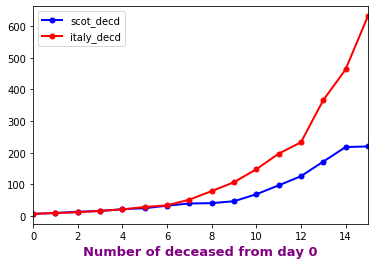

In [312]:
#plot our number of deaths for Scotland and Italy

# multiple line plot
plt.plot( 'date index', 'scot_decd', data=df_merged, marker='o', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.plot( 'date index', 'italy_decd', data=df_merged, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.xlim(0,15)
plt.xlabel('Number of deceased from day 0', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()



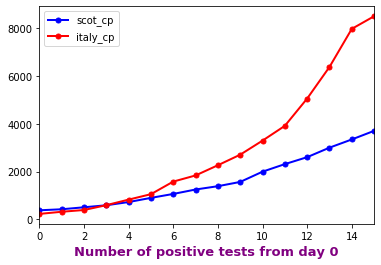

In [313]:
#plot our number of Confirmed Positive cases for Scotland and Italy

plt.plot( 'date index', 'scot_cp', data=df_merged, marker='o', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.plot( 'date index', 'italy_cp', data=df_merged, marker='o', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.xlim(0,15)
plt.xlabel('Number of positive tests from day 0', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()


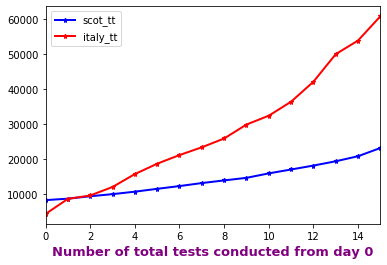

In [314]:
#plot our Total number of Tests administered for Scotland and Italy

plt.plot( 'date index', 'scot_tt', data=df_merged, marker='*', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.plot( 'date index', 'italy_tt', data=df_merged, marker='*', markerfacecolor='red', markersize=5, color='red', linewidth=2)
plt.xlim(0,15)
plt.xlabel('Number of total tests conducted from day 0', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()


## Look at Scotland's testing overall
is it being ramped up?

In [315]:
# Import the data for Scotland
df_tests = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/scot_tests.csv')



In [316]:
df_tests.tail(10)

,Date,Conducted,Today Positive,Today Negative,Total Positive,Total Negative,Total
63,27-Mar-2020,786,165,631,1059,11214,12273
64,28-Mar-2020,860,186,674,1245,11888,13133
65,29-Mar-2020,756,139,617,1384,12505,13889
66,30-Mar-2020,735,179,556,1563,13061,14624
67,31-Mar-2020,1271,430,841,1993,13902,15895
68,01-Apr-2020,1112,317,795,2310,14697,17007
69,02-Apr-2020,1121,292,829,2602,15526,18128
70,03-Apr-2020,1407,399,1008,3001,16534,19535
71,04-Apr-2020,1263,344,919,3345,17453,20798
72,05-Apr-2020,2345,361,1984,3706,19437,23143


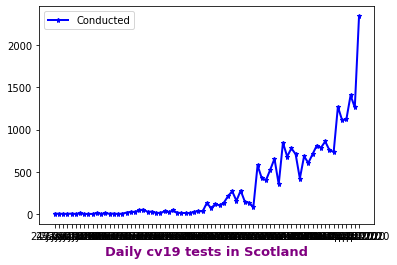

In [317]:
plt.plot( 'Date', 'Conducted', data=df_tests, marker='*', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.xlabel('Daily cv19 tests in Scotland', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()

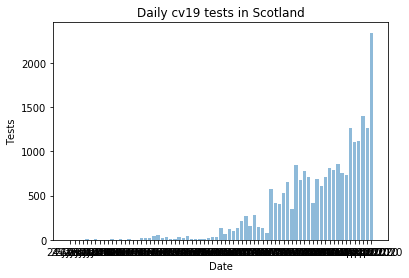

In [318]:

plt.bar('Date', 'Conducted', data=df_tests, align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel('Tests')
plt.title('Daily cv19 tests in Scotland')

plt.show()

In [319]:
# Import the data for Scotland
df_scoticu = pd.read_csv('https://raw.githubusercontent.com/watty62/Scot_covid19/master/data/processed/intensive_care.csv')



In [320]:
df_scoticu

,date,icu_patients
0,23-Mar-2020,23.0
1,24-Mar-2020,24.0
2,25-Mar-2020,51.0
3,26-Mar-2020,57.0
4,27-Mar-2020,72.0
5,29-Mar-2020,95.0
6,30-Mar-2020,108.0
7,31-Mar-2020,135.0
8,01-Apr-2020,147.0
9,02-Apr-2020,262.0


In [321]:
df_scoticu.columns = ["Date", "ICU Patients"]

In [322]:
df_scoticu

,Date,ICU Patients
0,23-Mar-2020,23.0
1,24-Mar-2020,24.0
2,25-Mar-2020,51.0
3,26-Mar-2020,57.0
4,27-Mar-2020,72.0
5,29-Mar-2020,95.0
6,30-Mar-2020,108.0
7,31-Mar-2020,135.0
8,01-Apr-2020,147.0
9,02-Apr-2020,262.0


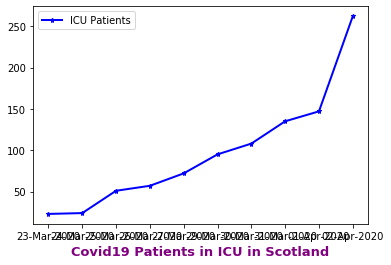

In [323]:
plt.plot( 'Date', 'ICU Patients', data=df_scoticu, marker='*', markerfacecolor='blue', markersize=5, color='blue', linewidth=2)
plt.xlabel('Covid19 Patients in ICU in Scotland', fontweight='bold', color = 'Purple', fontsize='13', horizontalalignment='center')
plt.legend()